# Entfernen des Straßentyps `service` 

### Genauere Betrachtung von `service`

* Service ein Straßentyp, der für unseren Anwendungsfall nicht maßgeblich relevant ist, da es sich hierbei meist um Einfahrten und kurze Zufahrtsstraßen handelt.
* Da vielen Polygonen eine verhältnismäßig große Anzahl des Straßentyps `service` zugeordnet wird und somit das Verhältnis der Straßentypen maßgeblich beeinflusst wird, entfernen wir den `highway`-Typ `service` aus dem Datensatz für weitere Betrachtungen und ein vergleichendes Modelltraining.

Das Vorgehen orientiert sich u.a. an folgendem Notebook (inkl. detaillierten Erläuterungen): [osm_highway](osm_highway.ipynb)

- Straßentypen, die unter 1% vertreten sind, wurden zu `highway_rare` zusammengefasst. 

In [28]:
import pyrosm

import matplotlib.pyplot as plt
import geopandas as gpd

### `highway`-Datensatz laden
Dieser Datensatz wurde schon bereinigt. Die Straßentypen, die unter 1% vetreten sind, wurden zu `highway_rare` zusammengefasst. 

Vgl. hierzu: Notebook [osm_highway](osm_highway.ipynb)

In [38]:
highways = gpd.read_file("../../data/processed_data/filtered_osm_highway_v1.geojson")

In [44]:
highways.head(3)

,highway,geometry
0,residential,"MULTILINESTRING ((13.53136 52.49263, 13.53136 ..."
1,residential,"MULTILINESTRING ((13.52694 52.48969, 13.52639 ..."
2,residential,"MULTILINESTRING ((13.52477 52.48558, 13.52484 ..."


In [45]:
# Liste der verschiedenen Straßentypen und deren Häufigkeit im Netzwerk
highway_counts = highways['highway'].value_counts(normalize=True)*100
highway_counts.head()

highway
service        52.063664
residential    16.757703
secondary       6.449211
path            5.347240
cycleway        4.170216
Name: proportion, dtype: float64

### Entfernen des highway-Typs `service`

In [46]:
# Bedingung zum Entfernen der Zeilen, in denen `highway` == 'service'
highways_without_service = highways[highways['highway'] != 'service']

### Visualisierung der Verteilung der Straßentypen

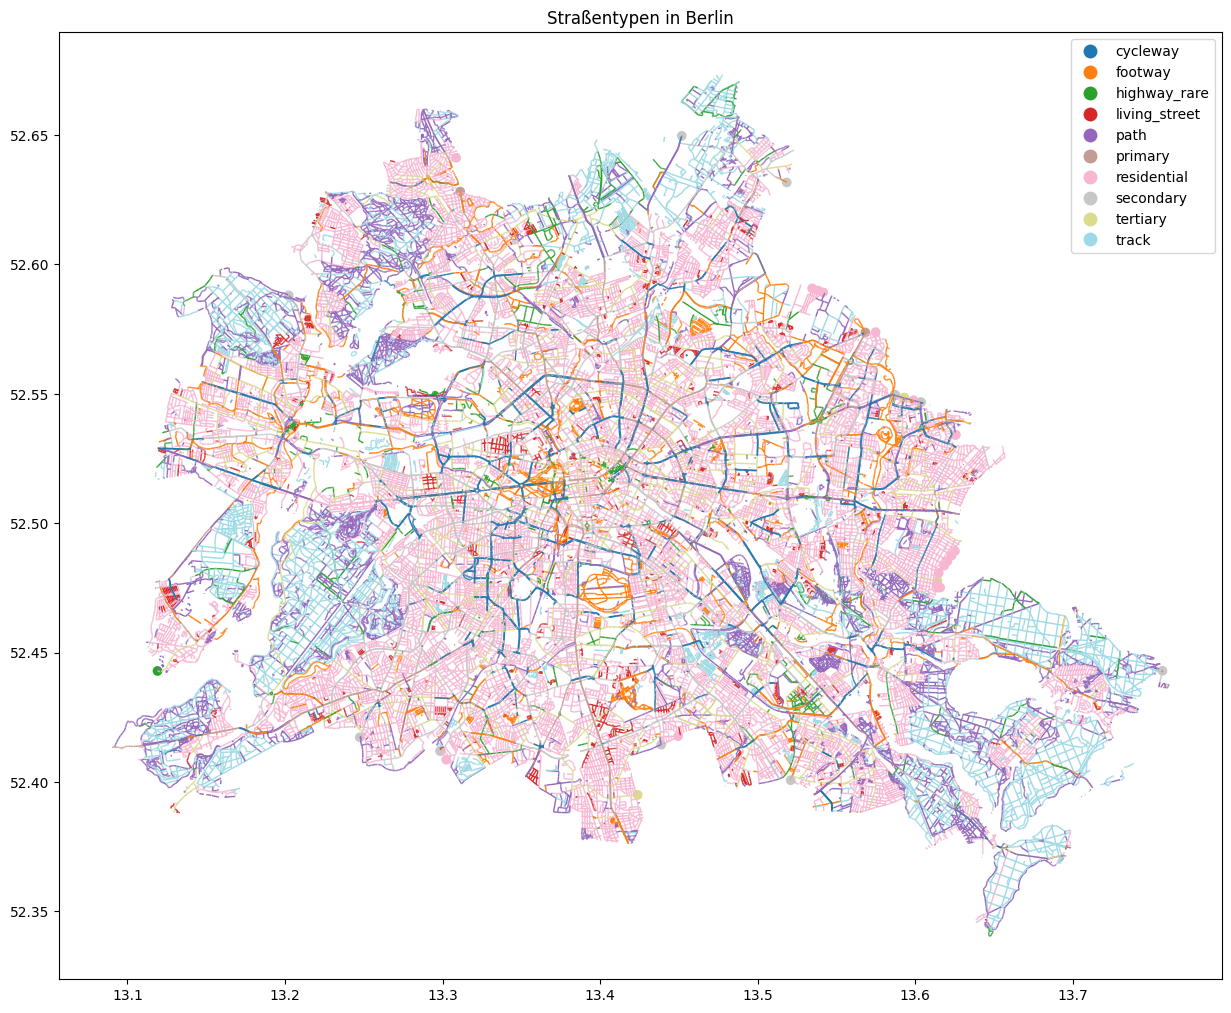

In [49]:
# Plotten des Straßennetzwerks
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
# Verwenden des 'tab20' Farbkarte, um bis zu 20 verschiedene Farben zu unterscheiden
base = highways_without_service.plot(column='highway', ax=ax, legend=True,
                             cmap='tab20', linewidth=1, legend_kwds={'bbox_to_anchor': (1, 1)})

plt.title("Straßentypen in Berlin")
plt.show()

In [50]:
# Liste der verschiedenen Straßentypen und deren Häufigkeit im Netzwerk
highway__counts = highways_without_service['highway'].value_counts(normalize=True)*100
highway_without_service_counts

highway
residential       34.958248
secondary         13.453700
path              11.154878
cycleway           8.699488
tertiary           7.986232
footway            7.827178
track              5.717232
primary            4.862319
living_street      2.713853
unclassified       1.164322
pedestrian         0.535563
secondary_link     0.280829
bridleway          0.177693
primary_link       0.150355
steps              0.116805
construction       0.072071
tertiary_link      0.064616
trunk              0.021124
busway             0.018639
elevator           0.013669
street_lamp        0.004970
proposed           0.001243
road               0.001243
services           0.001243
rest_area          0.001243
bus_stop           0.001243
Name: proportion, dtype: float64

In [52]:
print(highways_without_service['highway'].unique())

['residential' 'primary' 'secondary' 'living_street' 'tertiary'
 'highway_rare' 'path' 'footway' 'cycleway' 'track']


In [54]:
# Speichern der gefilterten Straßentypen in einer GeoJSON-Datei
output_file_name = "../../data/processed_data/osm_highway_without_service.geojson"
highways_without_service.to_file(output_file_name, driver="GeoJSON")

print(f"Gefilterte Straßentypen wurden gespeichert.")

Gefilterte Straßentypen wurden gespeichert.
